In [1]:
import pandas as pd
import numpy as np
import os
import math
import re
import random
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap, Normalize
import igraph as ig
from collections import Counter
import scipy.stats
import seaborn as sns
from matplotlib.font_manager import FontProperties  # 导入FontProperties
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap, Normalize
import warnings
import networkx as nx
warnings.filterwarnings("ignore")
from math import log10

In [2]:
path1 = r'E:\netData\complexNetdataset\blogs-data.csv'
path2 = r'E:\netData\complexNetdataset\email-data.csv'
path3 = r'E:\netData\complexNetdataset\Wiki-data.csv'

In [3]:
file_path1 = r'E:\netData\complexNetdataset\blogs.txt'
file_path2 = r'E:\netData\complexNetdataset\email.txt'
file_path3 = r'E:\netData\complexNetdataset\wikipedia.txt'

In [40]:
def components(datac , ff1 , n):
    N = nx.Graph(n)
    components = []
    for i in ff1.sort_values(datac,ascending=False).index:
        components.append(len(max(nx.connected_components(N), key=len)))
        N.remove_nodes_from([i])
    return components

In [27]:
markers = ["o" , "s" , "d"]

def drawx(componentslst , labellst):
    c = plt.rcParams['axes.prop_cycle'].by_key()['color']
    f, ax = plt.subplots(figsize=(12, 8))
    
    for i in range(len(componentslst)):
        components = np.array(componentslst[i])
        label = labellst[i]
        
        size = rescaled_arr = np.interp(components, (components.min(), components.max()), (10, 50))
        
        plt.scatter(range(len(n)),components,s=size , marker = markers[i],edgecolors=c[i],alpha=.9 , label = label)
        plt.plot(range(len(n)),components, c = c[i],linestyle = '--', linewidth=3.5)
    

    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.legend(fontsize = 25 , loc = 'lower left')
    plt.show()

In [79]:
def drawx2(componentslst , labellst):
    c = plt.rcParams['axes.prop_cycle'].by_key()['color']
    f, ax = plt.subplots(figsize=(6, 4))
    
    for i in range(len(componentslst)):
        components = np.array(componentslst[i])
        label = labellst[i]
        
        size = rescaled_arr = np.interp(components, (components.min(), components.max()), (10, 100))
        plt.scatter(range(len(n)),components,s=size, marker = markers[i],edgecolors=c[i+3],alpha=.6 , label = label)
        plt.plot(range(len(n)),components, c = c[i+3],linestyle = '--', linewidth=3.5)
    

    plt.xticks(fontsize=15)
    plt.yticks(fontsize=21)
    plt.legend(fontsize = 23)
    plt.show()

# Blogs

In [56]:
with open(file_path1) as f:
    d = f.readlines()
    
edgesdata = []
for i in d:
    edgesdata.append(i.strip().split()[::-1])
edgesdata = np.array(edgesdata).astype(int)
g = ig.Graph(edges=edgesdata, directed=True)

n = g.to_networkx()

ff = pd.read_csv(path1)
ff = ff[['D', '2stepD', 'CD', 'degree', 'h-index', 'pagerank']]

In [57]:
componentslst = []
labellst = []

ff1 = ff[ff['degree']>0]
n.remove_nodes_from(ff[ff['degree']==0].index)
for column in ff.columns:
    label = column
    component = components(column , ff1 , n)
    componentslst.append(component)
    label = label + "  " + "{}".format(np.round(sum(component) / len(component)/len(component) , 3) )
    labellst.append(label)

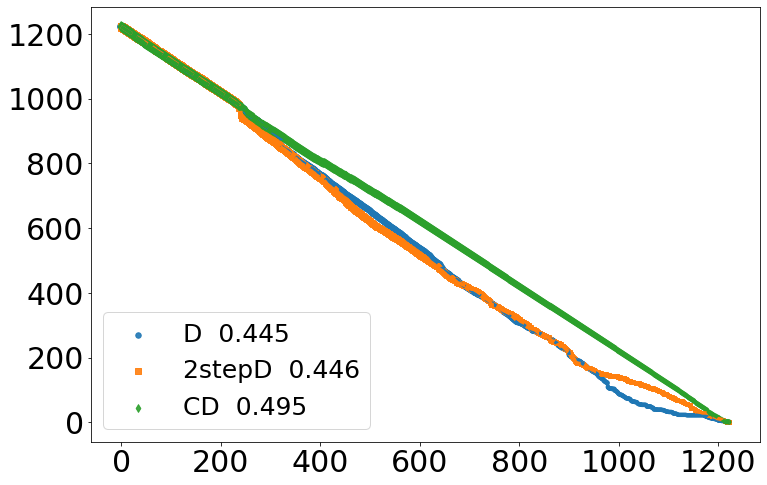

In [58]:
drawx(componentslst[:3] , labellst[:3])

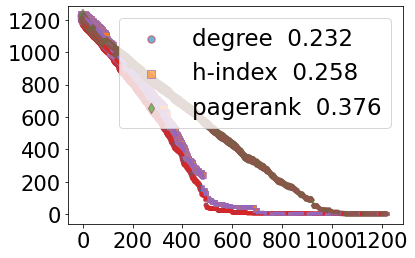

In [59]:
drawx2(componentslst[3:] , labellst[3:])

# Email

In [75]:
with open(file_path2) as f:
    d = f.readlines()
    
edgesdata = []
for i in d:
    edgesdata.append(i.strip().split()[:2][::-1])
edgesdata = np.array(edgesdata).astype(int)

g = ig.Graph(edges=edgesdata, directed=True)
n = g.to_networkx()

ff = pd.read_csv(path2)
ff = ff[['D', '2stepD', 'CD', 'degree', 'h-index', 'pagerank']]

In [76]:
componentslst = []
labellst = []
for column in ff.columns:
    label = column
    component = components(column , ff , n)
    componentslst.append(component)
    label = label + "  " + "{}".format(np.round(sum(component) / len(component)/len(component) , 3) )
    labellst.append(label)

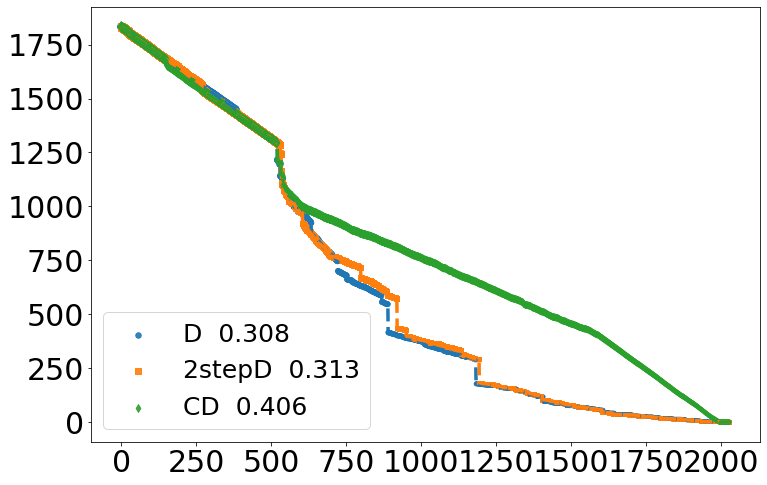

In [77]:
drawx(componentslst[:3] , labellst[:3])

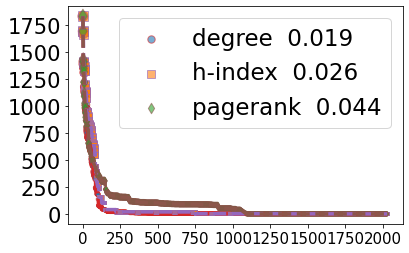

In [80]:
drawx2(componentslst[3:] , labellst[3:])

# Wiki

In [69]:
with open(file_path3) as f:
    d = f.readlines()
    
edgesdata = []
for i in d:
    edgesdata.append(i.strip().split()[:2][::-1])
edgesdata = np.array(edgesdata).astype(int)

g = ig.Graph(edges=edgesdata, directed=True)
n = g.to_networkx()

ff = pd.read_csv(path3)
ff = ff[['D', '2stepD', 'CD', 'degree', 'h-index', 'pagerank']]

In [70]:
componentslst = []
labellst = []

for column in ff.columns:
    label = column
    component = components(column , ff , n)
    componentslst.append(component)
    label = label + "  " + "{}".format(np.round(sum(component) / len(component)/len(component) , 3) )
    labellst.append(label)

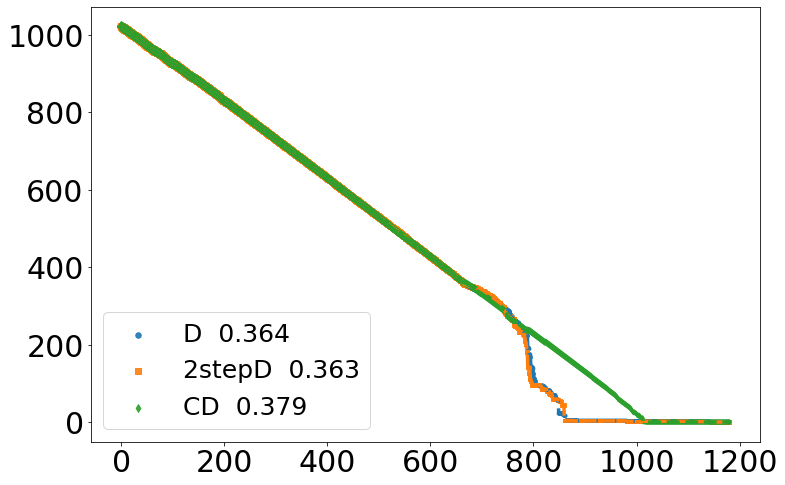

In [71]:
drawx(componentslst[:3] , labellst[:3])

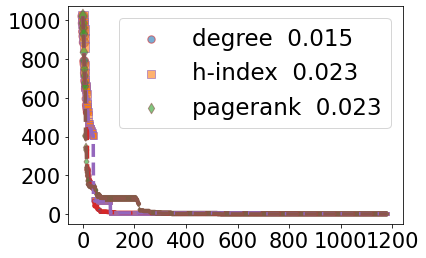

In [72]:
drawx2(componentslst[3:] , labellst[3:])

# APS

In [83]:
path1 = r'E:\netData\APS\aps-dataset-citations-2010.zip'
f1 = pd.read_csv(path1)

f1 = f1[['citing_doi', 'cited_doi']]

ff = pd.read_csv(r'E:\netData\APS\3 properties\nodepro2010.zip')

f1['citing_id'] = f1['citing_doi'].map(dict(zip(ff['id'],ff.index)))
f1['cited_id'] =  f1['cited_doi'].map(dict(zip(ff['id'],ff.index)))
f11 = f1[['cited_id','citing_id']].copy()
f11 = f11[f11.columns[::-1]]

g = ig.Graph.DataFrame(f11, directed=True)

n = g.to_networkx()

In [84]:
ff = ff[['D', '2stepD', 'CD', 'degree', 'h', 'pagerank']]

In [88]:
ff1 = ff[ff['degree']>200]

In [90]:
n.remove_nodes_from(ff[ff['degree']<=200])

In [ ]:
componentslst = []
labellst = []
for column in ff.columns:
    label = column
    component = components(column , ff1 , n)
    componentslst.append(component)
    label = label + "  " + "{}".format(np.round(sum(component) / len(component)/len(component) , 3) )
    labellst.append(label)

In [ ]:
drawx(componentslst[:3] , labellst[:3])

In [ ]:
drawx2(componentslst[3:] , labellst[3:])